In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_parquet('../features/dev_features_dataset.parquet')

In [11]:
df = df[df['label'].isin(['FNSZ','GNSZ','CPSZ','TNSZ','TCSZ'])].reset_index(drop=True)

In [12]:
# Contagem de batimentos por tipo de crise
df['label'].value_counts()

label
FNSZ    31900
GNSZ    19348
TCSZ     8129
CPSZ     5480
TNSZ      509
Name: count, dtype: int64

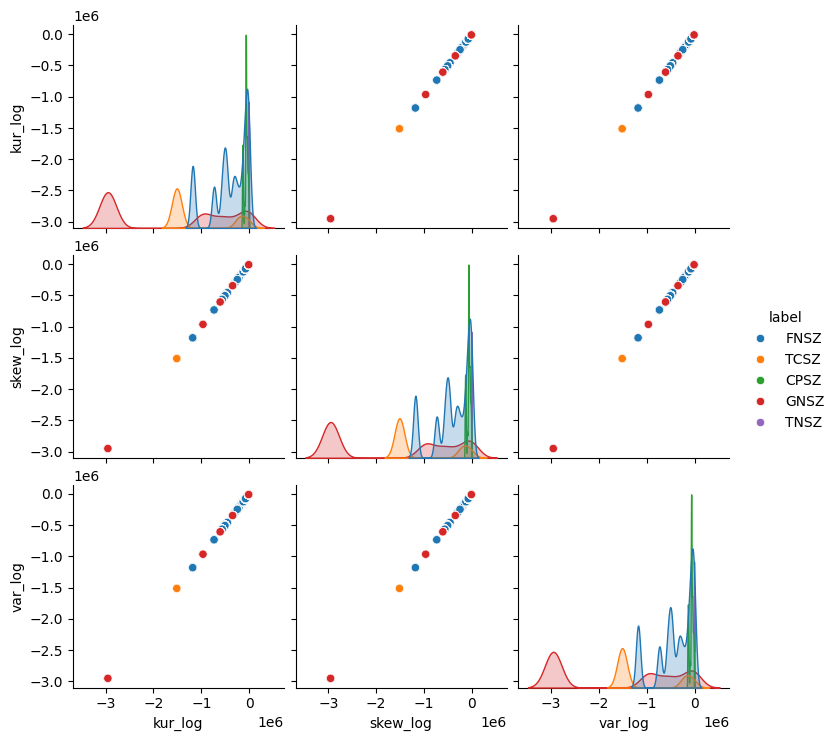

In [16]:
sns.pairplot(data=df,hue='label')

<Axes: xlabel='label', ylabel='var_log'>

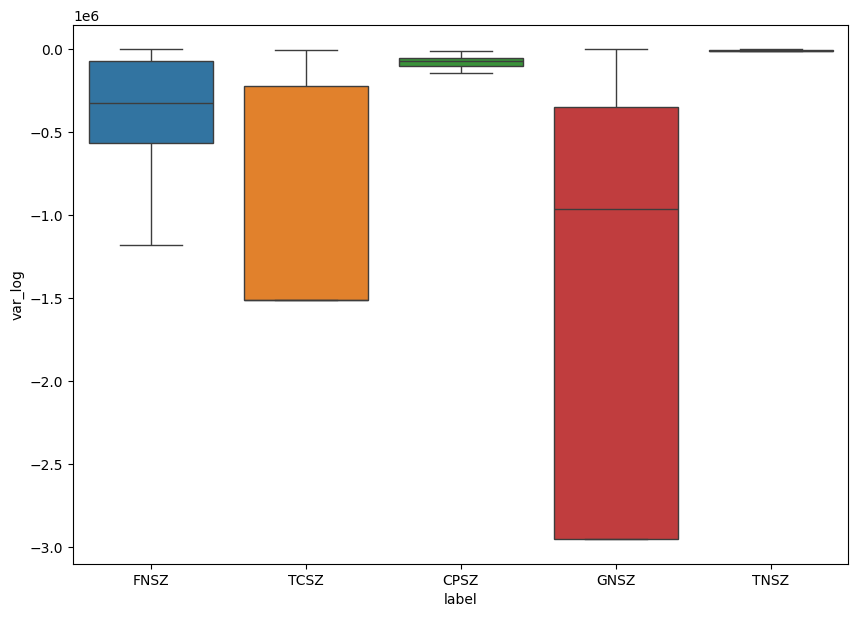

In [15]:
fig = plt.figure(figsize=(10,7))

sns.boxplot(x='label',y='var_log',data=df,hue='label')

In [27]:
import os
from os.path import join, dirname
from dotenv import load_dotenv

dotenv_path = join(dirname('__file__'), '.env')

load_dotenv(dotenv_path)

DATALAKE_PATH = os.environ.get("DATALAKE_PATH")
ROOT_PATH = os.environ.get("ROOT_PATH")
SOURCE_PATH = os.environ.get("SOURCE_PATH")


SUB_PATH = 'tuh_seizures/processed/ecg_beats/dev'

files = pd.read_csv(f'{DATALAKE_PATH}/{SUB_PATH}/files.csv', header=None)[0].to_list()[1:]

In [28]:
from scipy.io import loadmat
    
d = loadmat(f'{DATALAKE_PATH}/{SUB_PATH}/{files[0]}')



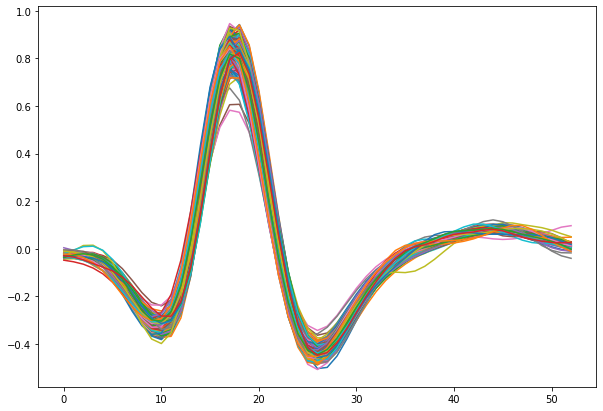

In [29]:
import matplotlib.pyplot as plt

b = d['QRS']

fig = plt.figure(figsize=(10,7))
for i in range(b.shape[1]):
    plt.plot(b[:,i]*-1)